[*********************100%***********************]  1 of 1 completed
S0 =  120.72000122070312


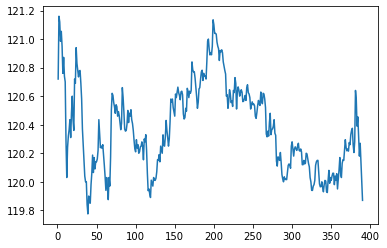

0.501445864006855


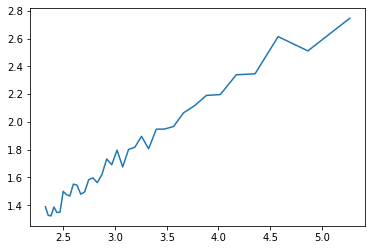

H =  0.501445864006855
mu =  -0.007065979439434103
sigma =  0.498554135993145


In [36]:
from datetime import datetime
import pandas_datareader as pdr
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf



def hurst(ts):

    """Returns the Hurst Exponent of the time series vector ts"""
    # Create the range of lag values
    npts = np.array(ts)
    logs = log(npts[:-1]/npts[1:])
    groups = np.arange(int(len(logs) / 10), 1, -1)
    RS = np.zeros(len(groups)+1)
    line = np.zeros(len(groups)+1)
    #print("logs len = ", len(logs))
    #print("groups ", groups)
    #print(len(RS),RS)
    
    for group in groups:
        #print(group)
        sub_RS = np.zeros(group)
        stdev = np.zeros(group)
        line[group-1] = len(logs)/group
        for sub in range(group):
            RSmax, RSmin = 0, 0
            #print(len(sub_RS),sub_RS)
            sub_group = np.array(logs[int(len(logs)/group)*sub : int(len(logs)/group*(sub+1))])
            #print(len(sub_group), sub_group)
            for in_sub in range(1, int(len(logs)/group)):
                #RS[group] += logs[int(len(logs)/group*sub + in_sub]
                sub_RS[sub] += sub_group[in_sub]
                RSmax = max(sub_RS[sub], RSmax)
                RSmin = min(sub_RS[sub], RSmin)
            sub_RS[sub] = RSmax - RSmin
            stdev[sub] = std(sub_group)
            #print(len(sub_RS), sub_RS)
            #print(len(stdev), stdev)
        a = sub_RS / stdev
        #print(a)
        RS[group-1] = a.mean()
    #print(RS[1:])
    #print(groups)
    #print(len(line), line[1:])
    poly = polyfit(log(line[1:]), log(RS[1:]), 1)
    #print(poly[0])
    #plt.plot(log(line[1:]), log(RS[1:]))
    #plt.show()
    mu = log(npts[len(npts)-1]/npts[0])
    sigma = 1 - poly[0]
    H = poly[0] 
    #print("H = ", poly[0])
    #print("mu = ", mu)
    #print("sigma = ", sigma)
    return H    
        
        
    
    #lags = range(2, 100)
    #for lag in 
    #tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]

    # Use a linear fit to estimate the Hurst Exponent
    #poly = polyfit(log(lags), log(tau), 1)

    # Return the Hurst exponent from the polyfit output
    #return poly[0]*2.0


# Download the stock prices series from Yahoo
#aapl = pdr.DataReader("MMM", "yahoo", datetime(2020,6,1), datetime(2021,3,22))
#print(aapl)

data = yf.download(tickers="AAPL", period="1d", interval="1m")
ticks = np.arange(1,len(data['Adj Close'])+1)
print("S0 = ", data['Adj Close'][0])

plt.plot(ticks, data['Adj Close'])
plt.show()   
#print(data)
# Call the function
params(data['Adj Close'])
